In [5]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value (iris species) is the last column
X = iris[:,0:-1] # features are the other columns

In [6]:
print "data point: ",  X.shape[0]
print "feature: ",  X.shape[1]


data point:  148
feature:  4


mean: 5.900103764189188
std:  0.833402066774894


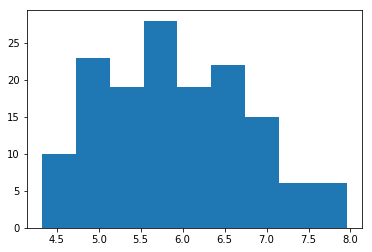

In [7]:
plt.hist(X[:,0], bins = 'auto')
print 'mean:', np.mean(X[:,0])
print 'std: ', np.std(X[:,0])

mean: 3.098930916891892
std:  0.43629183800107685


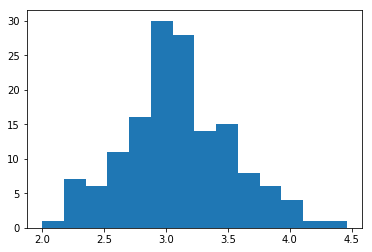

In [8]:
plt.hist(X[:,1], bins = 'auto')
print 'mean:', np.mean(X[:,1])
print 'std: ', np.std(X[:,1])

mean: 3.8195548405405404
std:  1.7540571093439352


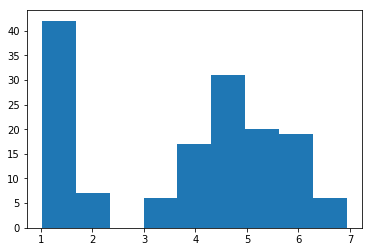

In [9]:
plt.hist(X[:,2], bins = 'auto')
print 'mean:', np.mean(X[:,2])
print 'std: ', np.std(X[:,2])

mean: 1.2525554845945945
std:  0.7587724570263247


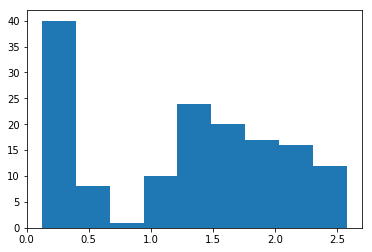

In [10]:
plt.hist(X[:,3], bins = 'auto')
print 'mean:', np.mean(X[:,3])
print 'std: ', np.std(X[:,3])

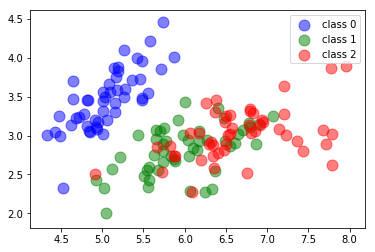

In [11]:
color = ['blue', 'green', 'red']
for i, c in enumerate(np.unique(iris[:,-1])):
    mask = np.where(iris[:,-1] == c)[0]
    plt.scatter(iris[mask,0], iris[mask, 1], s = 120, c = color[i], alpha = 0.50, label = 'class %d' %i)
plt.legend()
plt.show()

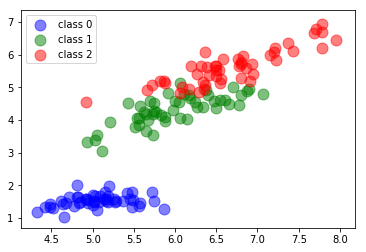

In [12]:
color = ['blue', 'green', 'red']
for i, c in enumerate(np.unique(iris[:,-1])):
    mask = np.where(iris[:,-1] == c)[0]
    plt.scatter(iris[mask,0], iris[mask, 2], s = 120, c = color[i], alpha = 0.50, label = 'class %d' %i)
plt.legend()
plt.show()

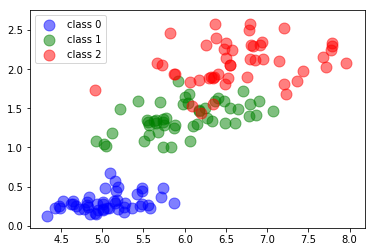

In [13]:
color = ['blue', 'green', 'red']
for i, c in enumerate(np.unique(iris[:,-1])):
    mask = np.where(iris[:,-1] == c)[0]
    plt.scatter(iris[mask,0], iris[mask, 3], s = 120, c = color[i], alpha = 0.50, label = 'class %d' %i)
plt.legend()
plt.show()

In [17]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We'll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
# import sys
# sys.path.append('/path/to/parent/dir/');

np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75) # split data into 75/25 train/validation

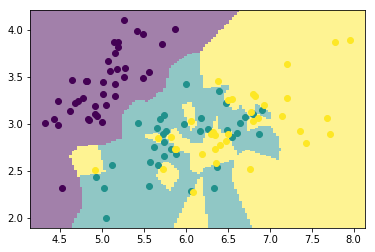

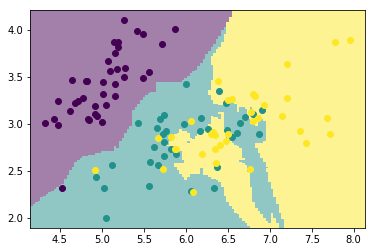

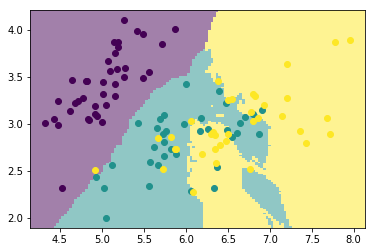

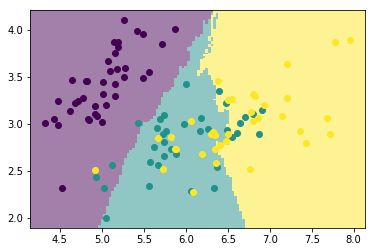

In [22]:
K = [1, 5, 10, 50]
knn = ml.knn.knnClassify() # create the object and train it

for i in K:
    #knn = ml.knn.knnClassify()
    knn.train(Xtr[:,:2], Ytr, i) # where K is an integer, e.g. 1 for nearest neighbor prediction
    YvaHat = knn.predict(Xva[:,:2]) # get estimates of y for each data point in Xva
    ml.plotClassify2D( knn, Xtr[:,:2], Ytr )
    plt.show()
    

C:\Users\Owner\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


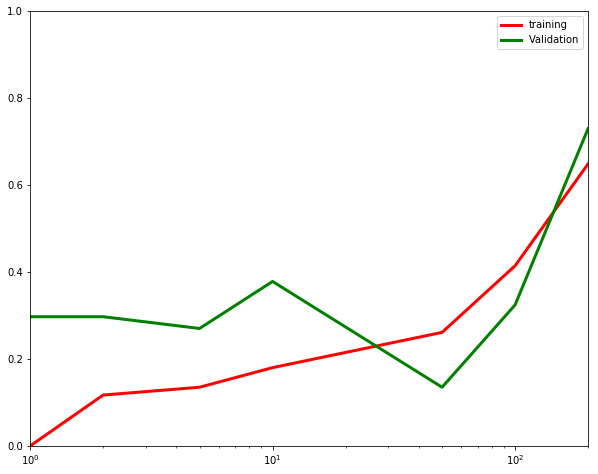

I would recommend K = 5 because that is the lowest validation point where validation is on top.


In [23]:
K=[1,2,5,10,50,100,200]
errTrain = [None]*len(K) # (preallocate storage for training error)
errVal = [None]*len(K)
for i, k in enumerate(K):
    count = 0
    learner = ml.knn.knnClassify() # TODO: complete code to train model
    learner.train(Xtr[:,:2], Ytr, k)
    Yhat = learner.predict(Xtr[:,:2]) # TODO: predict results on training data
    for a,b in zip(Yhat, Ytr):
        if a != b:
            count += 1
    errTrain[i] = (float(count) / float(len(Ytr))) # TODO: count what fraction of predictions are wrong
    #TODO: repeat prediction / error evaluation for validation data
    count = 0
    learner2 = ml.knn.knnClassify()
    learner2.train(Xtr[:,:2], Ytr, k)
    Yhat2 = learner.predict(Xva[:,:2])
    for a,b in zip(Yhat2, Yva):
        if a != b:
            count += 1
    errVal[i] = (float(count) / float(len(Yva)))
    
    
    
fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.semilogx(K, errTrain, 'r-', lw = 3, label = 'training') #TODO: average and plot results on semi-log scale
plt.semilogx(K, errVal,'g-', lw=3, label='Validation')
plt.legend()
ax.set_xlim(0,200)
ax.set_ylim(0,1)
plt.show()

print "I would recommend K = 5 because that is the lowest validation point where validation is on top."

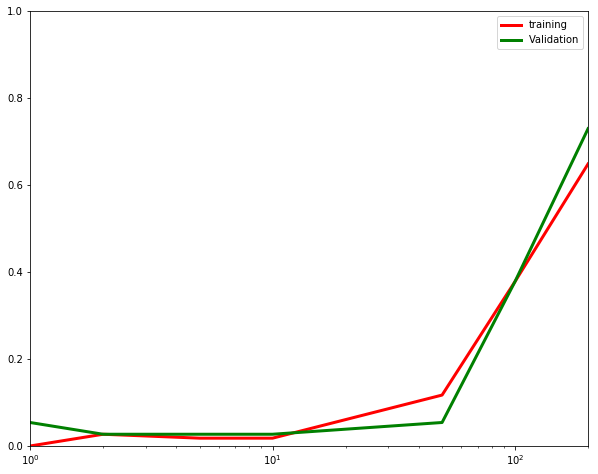

I would recommend a different value of K. K = 2 because the error rate is low and because the training and validation is the  same.


In [26]:
K=[1,2,5,10,50,100,200]
errTrain = [None]*len(K) # (preallocate storage for training error)
errVal = [None]*len(K)
for i, k in enumerate(K):
    count = 0
    learner = ml.knn.knnClassify() # TODO: complete code to train model
    learner.train(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr) # TODO: predict results on training data
    for a,b in zip(Yhat, Ytr):
        if a != b:
            count += 1
    errTrain[i] = (float(count) / float(len(Ytr))) # TODO: count what fraction of predictions are wrong
    #TODO: repeat prediction / error evaluation for validation data
    count = 0
    learner2 = ml.knn.knnClassify()
    learner2.train(Xtr, Ytr, k)
    Yhat2 = learner.predict(Xva)
    for a,b in zip(Yhat2, Yva):
        if a != b:
            count += 1
    errVal[i] = (float(count) / float(len(Yva)))
    
    
    
fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.semilogx(K, errTrain, 'r-', lw = 3, label = 'training') #TODO: average and plot results on semi-log scale
plt.semilogx(K, errVal,'g-', lw=3, label='Validation')
plt.legend()
ax.set_xlim(0,200)
ax.set_ylim(0,1)
plt.show()

print "I would recommend a different value of K. K = 2 because the error rate is low and because the training and validation",  
print "is the  same."

In [ ]:
#p(y = 1) = 4/10               p(y = -1) = 6/10
#p(x1 = 1| y = 1) = 3/4        p(x1 = 1| y = -1) = 3/6
#p(x1 = 0| y = 1) = 1/4        p(x1 = 0| y = -1) = 3/6
#p(x2 = 1| y = 1) = 0/4        p(x2 = 1| y = -1) = 5/6
#p(x2 = 0| y = 1) = 4/4        p(x2 = 0| y = -1) = 1/6
#p(x3 = 1| y = 1) = 3/4        p(x3 = 1| y = -1) = 4/6
#p(x3 = 0| y = 1) = 1/4        p(x3 = 0| y = -1) = 2/6
#p(x4 = 1| y = 1) = 2/4        p(x4 = 1| y = -1) = 5/6
#p(x4 = 0| y = 1) = 2/4        p(x4 = 0| y = -1) = 1/6
#p(x5 = 1| y = 1) = 1/4        p(x5 = 1| y = -1) = 2/6
#p(x5 = 0| y = 1) = 3/4        p(x5 = 0| y = -1) = 4/6

In [25]:
#what class would be predicted for x(0,0,0,0,0)?
#p(y = 1 | x(0,0,0,0,0)) = 1/4 * 4/4 * 1/4 * 2/4 * 3/4 * 4/10 = 
# 0.009375 /(0.009375 + 0.001852) = 0.84 

#p(y = -1 | x(0,0,0,0,0)) = 3/6 * 1/6 * 2/6 * 1/6 * 4/6 * 6/10 = 
#0.001852 /(0.009375 + 0.001852) = 0.16
#read

#--------------------------------------------------------------------------
#what class would be predicted for x(1,1,0,1,0)?
#p(y = 1 | x(1,1,0,1,0,)) = 3/4 * 0/4 * 1/4 * 2/4 * 3/4 * 4/10 = 
#0 / 0.0463 = 0

#p(y = -1 | x(1,1,0,1,0,)) = 3/6 * 5/6 * 2/6 * 5/6 * 4/6 * 6/10 = 
#0.0463 / 0.0463 = 1
#discard

In [ ]:
#posterior probability y = 1 given x = (0,0,0,0,0)
#p(y = 1 | x(0,0,0,0,0))
# = (1/4 * 4/4 * 1/4 * 2/4 * 3/4 * 4/10)/p(x1)p(x2)p(x3)p(x4)p(x5)
# = 0.009375 / 0.0126 = 0.744
#p(x1) = 1/4 * 4/10 + 3/6 * 6/10 = 0.4
#p(x2) = 4/4 * 4/10 + 1/6 * 6/10 = 0.5
#p(x3) = 1/4 * 4/10 + 2/6 * 6/10 = 0.3
#p(x4) = 2/4 * 4/10 + 1/6 * 6/10 = 0.3
#p(x5) = 3/4 * 4/10 + 4/6 * 6/10 = 0.7

#posterior probability y = 1 given x = (1,1,0,1,0)
#p(y = 1 | x(1,1,0,1,0,)) 
# = (3/4 * 0/4 * 1/4 * 2/4 * 3/4 * 4/10)/ p(x1)p(x2)p(x3)p(x4)p(x5) 
# = 0

In [ ]:
#we should not use a joint Bayers classifier becuase we have several discrete features. 
#If we use a Joint distribution, then we have 2^n possible features.
#The problem is that we only have a finite amount of data and the number of features grow exponentially. 
#If the amount of data is not enough, then some of the features will have no data associated with it with
# means we are estimating
#the probability of that feature occuring to be 0. 
#Therefore, if that feature ever occurs, out data would never allow it to be shows, which would lead to 
#a case of overfitting.

In [1]:
# we do not need to retrain the model because the features are independent of each other. 
# we can simply not include feature 1 in our calculations and decide class y based on the other 4.
# In the sutuation there is a tie, our model will predict y = +1 

In [3]:
#Statement of Collaboration
#For this assignment, I discussed with Jorge Carlos. We discussed how to interpret a training/validation graph,
# how to use certain plotting functions, and the differences between Joint and Naive Bayes.